In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [5]:
data = pd.read_csv("cleaned_weather_data.csv")

In [7]:
X = data[["Precipitation","Humidity"]]
y = data["Temperature"]

Regression lineaire

In [9]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(X)
normalized_data

array([[-0.42141137,  1.08411319],
       [-0.42141137, -0.64003525],
       [-0.42141137, -0.33282335],
       ...,
       [ 0.72372823,  0.21263453],
       [-0.42141137, -0.29520556],
       [-0.42141137, -0.47702485]])

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=42,random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test,y_pred)
print("RMSE : ",rmse)

RMSE :  45.705449099410984


Arbres de décisions

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [51]:
tree_model = DecisionTreeRegressor(max_depth=4,random_state=42)
tree_model.fit(X_train,y_train)
y_pred_tree = tree_model.predict(X_test)
rmse_tree = mean_squared_error(y_test,y_pred_tree)
r2score_tree = r2_score(y_test,y_pred_tree)
print("RMSE : ",rmse_tree)
print("R2 score : ",r2score_tree)

RMSE :  48.59185487839644
R2 score :  0.5391917397021826


Clustering

In [59]:
from sklearn.cluster import KMeans

In [110]:
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(X_train)
y_pred_kmeans = kmeans_model.predict(X_test)

In [112]:
import seaborn as sns

<Axes: xlabel='Precipitation', ylabel='Humidity'>

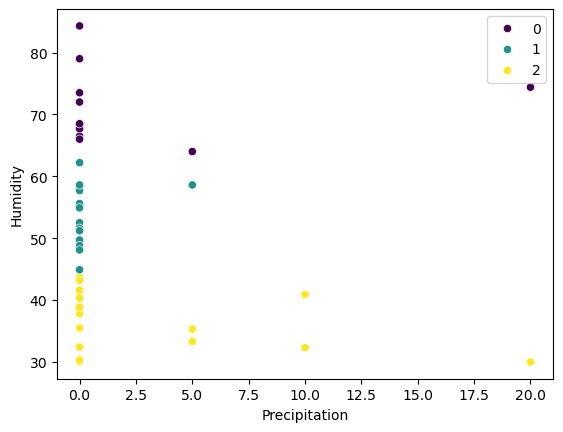

In [136]:
sns.scatterplot(
    x=X_test['Precipitation'],  # First feature of X_test
    y=X_test['Humidity'],  # Second feature of X_test
    hue=y_pred_kmeans,  # Predicted cluster labels
    palette="viridis",  # Color palette
    legend="full"
)